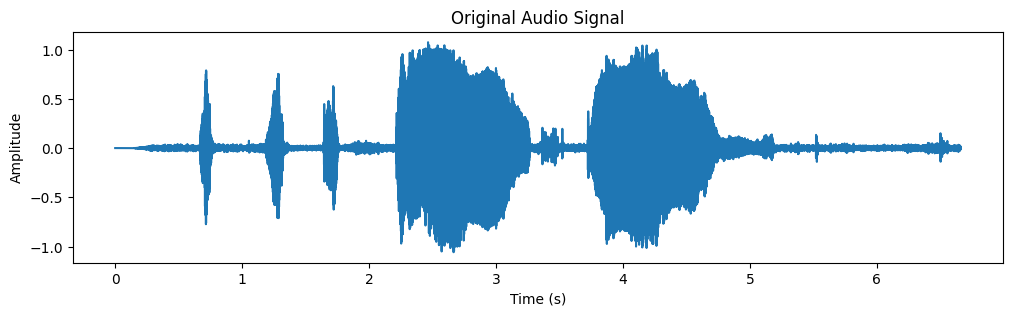

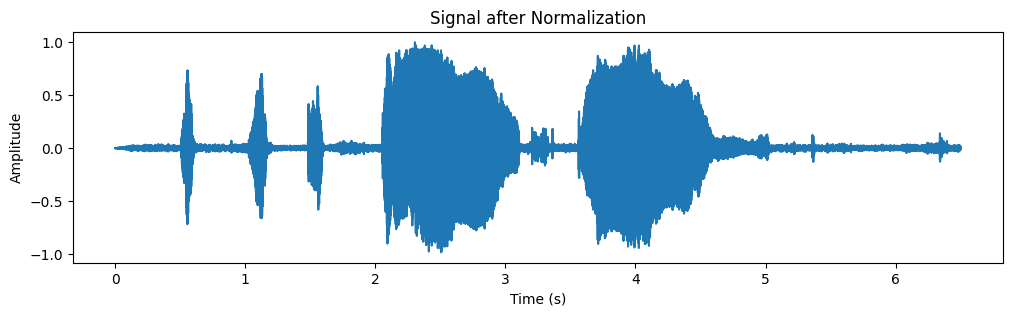

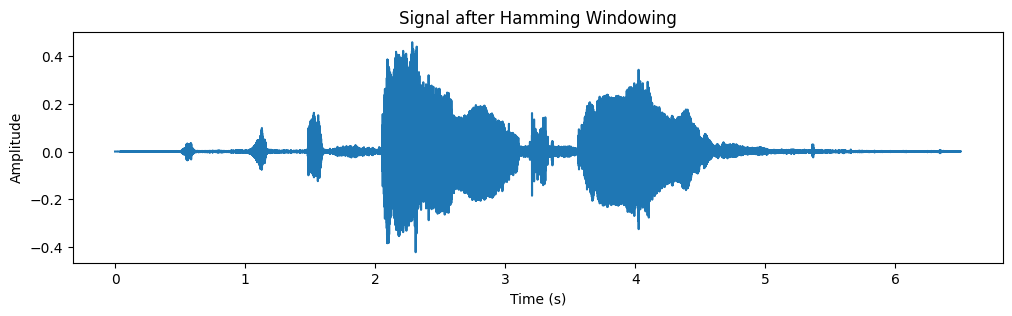

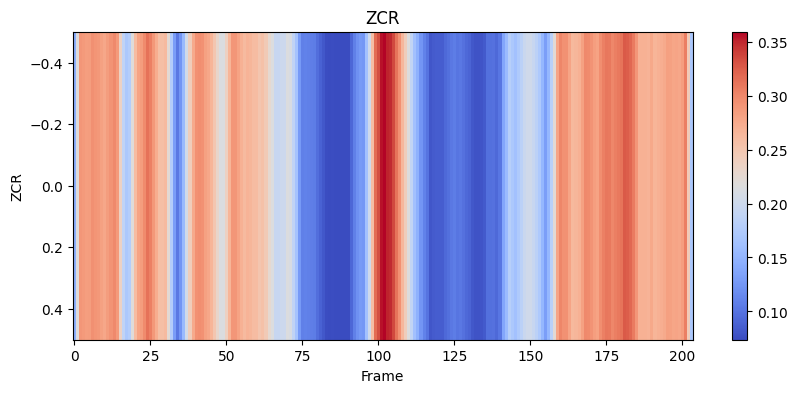

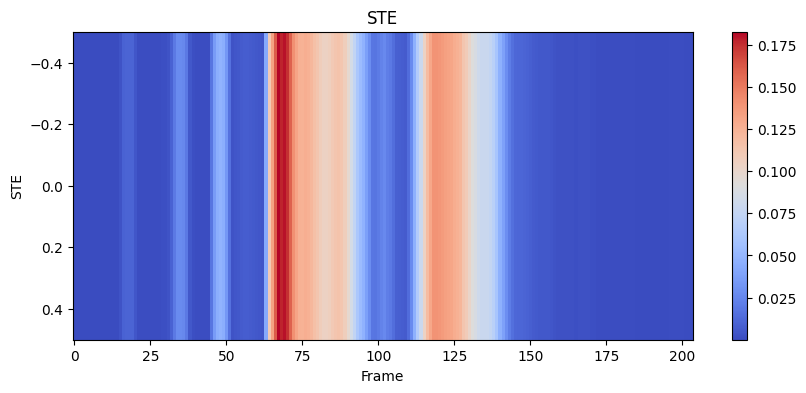

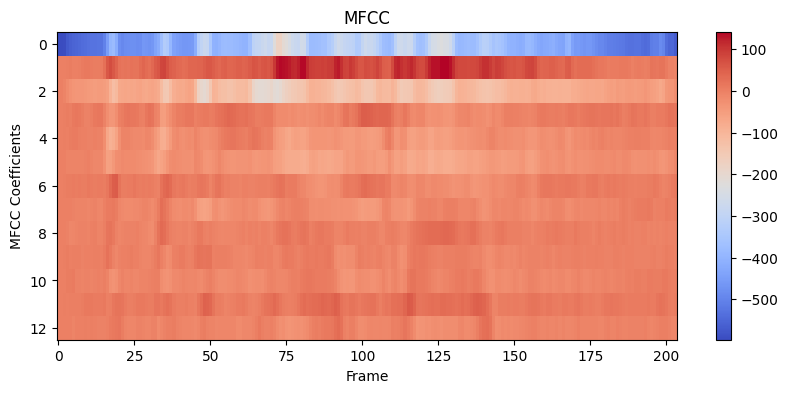

MFCC Coefficients:
 [[-5.97369436e+02 -5.97300174e+02 -5.91679004e+02 ... -5.53093696e+02
  -5.50870629e+02 -5.67637747e+02]
 [ 0.00000000e+00  7.64734300e-02 -1.25120889e+00 ... -4.08808317e+00
  -4.11240908e+00 -6.35989925e+00]
 [ 0.00000000e+00  2.14610278e-02 -5.43039280e+00 ... -3.51766184e+01
  -3.55628756e+01 -2.52274711e+01]
 ...
 [ 0.00000000e+00  8.74915703e-02 -3.45157262e-02 ...  5.37210718e+00
   1.82345216e+00  1.71412126e+00]
 [ 0.00000000e+00  4.07893920e-02  1.01860264e+00 ...  5.47269553e+00
   3.27509652e+00  4.03900027e+00]
 [ 0.00000000e+00 -2.37999766e-02 -1.07047320e+00 ... -3.46773037e+00
  -8.87093837e+00 -8.57448096e+00]]
MFCC Mean:
 [-3.97350301e+02  5.81444640e+01 -1.01609645e+02  2.02241357e+00
 -2.42364971e+01 -4.01145482e+01  1.72999466e-01 -1.46085487e+01
  2.99432878e+00 -1.90013566e+00 -8.47574591e+00  1.46588430e+01
 -7.06115901e+00]


In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_file = "D:\Dil\S.P.I.T Semester 6\Mini project\dataset\discomfort\discomfort (3).wav"
signal, sr = librosa.load(audio_file, sr=16000)

# Plot original audio signal
plt.figure(figsize=(12, 3))
plt.title("Original Audio Signal")
plt.plot(np.arange(len(signal)) / sr, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Sampling
# In this example, we are already using a sample rate of 16000 Hz so we do not need to resample the audio signal.

# Quantization
# Quantization is done implicitly during the audio file loading process with librosa.

# Silence Removal
# Remove leading and trailing silence
signal, _ = librosa.effects.trim(signal)

# Plot signal after silence removal
plt.figure(figsize=(12, 3))
plt.title("Signal after Silence Removal")
plt.plot(np.arange(len(signal)) / sr, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Normalization
signal = librosa.util.normalize(signal, )

# Plot signal after normalization
plt.figure(figsize=(12, 3))
plt.title("Signal after Normalization")
plt.plot(np.arange(len(signal)) / sr, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Pre-emphasis
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

# Plot signal after pre-emphasis
plt.figure(figsize=(12, 3))
plt.title("Signal after Pre-emphasis")
plt.plot(np.arange(len(emphasized_signal)) / sr, emphasized_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Hamming Windowing
hamming_window = np.hamming(len(emphasized_signal))
emphasized_signal = emphasized_signal * hamming_window

# Plot signal after Hamming windowing
plt.figure(figsize=(12, 3))
plt.title("Signal after Hamming Windowing")
plt.plot(np.arange(len(emphasized_signal)) / sr, emphasized_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Zero-crossing rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(y=emphasized_signal, frame_length=2048, hop_length=512)

# Get the mean of the ZCR features
zcr_mean = np.mean(zcr, axis=1)

# Plot ZCR
plt.figure(figsize=(10, 4))
plt.title("ZCR")
plt.imshow(zcr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xlabel("Frame")
plt.ylabel("ZCR")
plt.show()

# Short-time energy (STE)
ste = librosa.feature.rms(y=emphasized_signal, frame_length=2048, hop_length=512)

# Get the mean of the STE features
ste_mean = np.mean(ste, axis=1)

# Plot STE
plt.figure(figsize=(10, 4))
plt.title("STE")
plt.imshow(ste, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xlabel("Frame")
plt.ylabel("STE")
plt.show()

# MFCC
n_mfcc = 13
mfcc = librosa.feature.mfcc(y=emphasized_signal, sr=sr, n_mfcc=n_mfcc)

# Get the mean of the MFCC features
mfcc_mean = np.mean(mfcc, axis=1)

# Plot MFCC
plt.figure(figsize=(10, 4))
plt.title("MFCC")
plt.imshow(mfcc, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xlabel("Frame")
plt.ylabel("MFCC Coefficients")
plt.show()

# Print MFCC coefficients and their mean
print("MFCC Coefficients:\n", mfcc)
print("MFCC Mean:\n", mfcc_mean)